Simplified data loaded successfully!

First 5 rows of the dataframe:
   sqft  bedrooms  bathrooms     location     price
0  1200         2        2.0  Maharashtra  15000000
1   900         1        1.0        Delhi  10000000
2  1500         3        2.0    Karnataka  18000000
3  1100         2        1.5   Tamil Nadu  12000000
4  2000         4        3.0  Maharashtra  25000000

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sqft       196 non-null    int64  
 1   bedrooms   196 non-null    int64  
 2   bathrooms  196 non-null    float64
 3   location   196 non-null    object 
 4   price      196 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.8+ KB

Summary statistics of numerical columns:
              sqft    bedrooms   bathrooms         price
count   196.000000  196.000000  196.0000

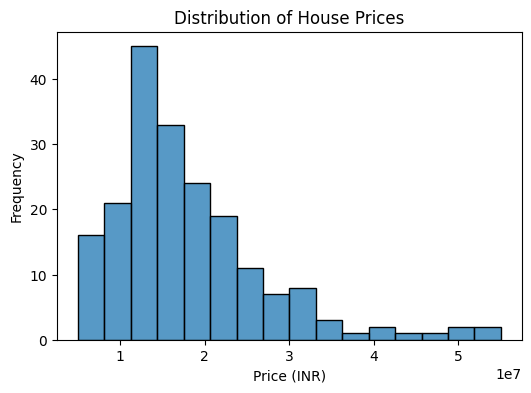

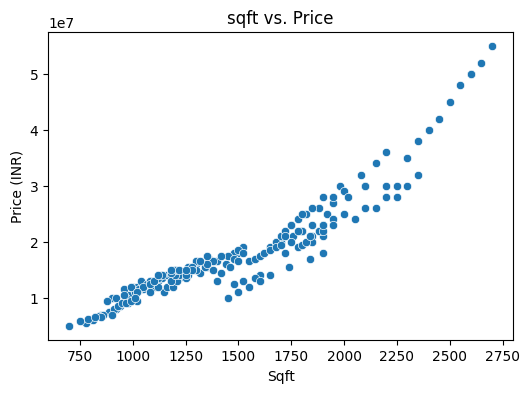

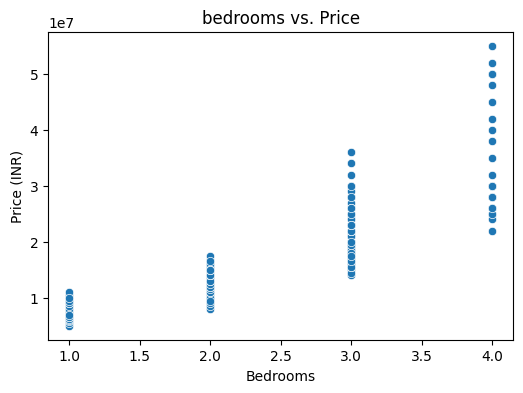

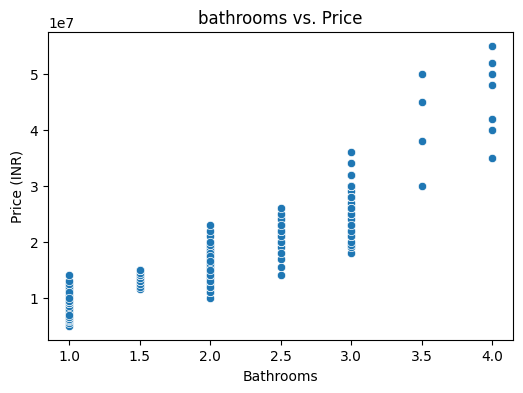

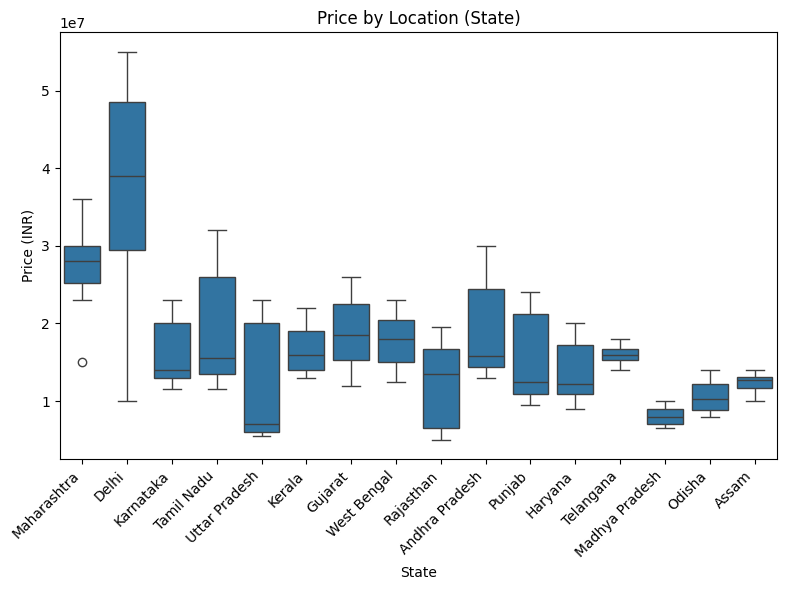

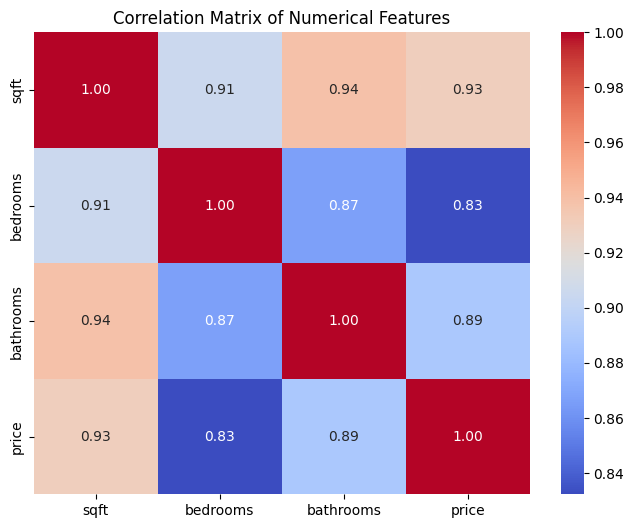


Exploratory Data Analysis steps completed on the simplified dataset.


In [ ]:
# notebooks/exploratory_data_analysis.ipynb

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '../data/house_price.csv'
try:
    df = pd.read_csv(data_path)
    print("Simplified data loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}. Please make sure 'house_prices.csv' is in the data folder.")
    df = None

if df is not None:
    print("\nFirst 5 rows of the dataframe:")
    print(df.head())

    print("\nInformation about the dataframe:")
    df.info()

    print("\nSummary statistics of numerical columns:")
    print(df.describe())

    plt.figure(figsize=(6, 4))
    sns.histplot(df['price'])
    plt.title('Distribution of House Prices')
    plt.xlabel('Price (INR)')
    plt.ylabel('Frequency')
    plt.show()

    # --- Explore Relationships with Numerical Features ---
    numerical_features = ['sqft', 'bedrooms', 'bathrooms']
    for feature in numerical_features:
        if feature in df.columns:
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=feature, y='price', data=df)
            plt.title(f'{feature} vs. Price')
            plt.xlabel(feature.capitalize())
            plt.ylabel('Price (INR)')
            plt.show()
        else:
            print(f"\n'{feature}' column not found in the dataset.")

    # --- Explore Relationships with the Categorical Feature (Location) ---
    if 'location' in df.columns:
        plt.figure(figsize=(8,6))
        sns.boxplot(x='location', y='price', data=df)
        plt.title('Price by Location (State)')
        plt.xlabel('State')
        plt.ylabel('Price (INR)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\n'location' column not found in the dataset.")

    # --- Correlation Matrix of Numerical Features ---
    numerical_df = df.select_dtypes(include=['number'])
    correlation_matrix = numerical_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    print("\nExploratory Data Analysis steps completed on the simplified dataset.")
else:
    print("Cannot proceed with EDA as the data was not loaded.")